In [1]:
import pandas as pd
import numpy as np
dataRaw = pd.read_csv("Energy_Data_20200920_20231027.csv")

dataRaw

,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price
0,2020-09-20T00:00:00Z,20.06,0.0,2108.489754,2206.064655,996.284,2.50,0.0,32.17
1,2020-09-20T00:30:00Z,19.77,0.0,2108.489754,2206.064655,957.576,15.00,0.0,32.17
2,2020-09-20T01:00:00Z,28.68,0.0,2108.489754,2206.064655,941.044,47.95,0.0,32.00
3,2020-09-20T01:30:00Z,28.97,0.0,2108.489754,2206.064655,964.366,29.13,0.0,32.00
4,2020-09-20T02:00:00Z,28.19,0.0,2108.489754,2206.064655,918.432,28.95,0.0,31.99
...,...,...,...,...,...,...,...,...,...
54379,2023-10-27T21:30:00Z,NaN,0.0,2331.383994,2487.180474,275.444,129.00,0.0,82.47
54380,2023-10-27T22:00:00Z,NaN,0.0,2331.383994,2487.180474,132.522,129.00,0.0,64.31
54381,2023-10-27T22:30:00Z,NaN,0.0,2331.383994,2487.180474,64.226,133.00,0.0,64.31
54382,2023-10-27T23:00:00Z,86.84,0.0,2331.383994,2487.180474,28.662,133.00,0.0,58.68


In [2]:
"""
Part : Preprocessing
"""

'\nPart : Preprocessing\n'

In [3]:
dataRaw.dtypes

dtm                             object
MIP                            float64
Solar_MW                       float64
Solar_capacity_mwp             float64
Solar_installedcapacity_mwp    float64
Wind_MW                        float64
SS_Price                       float64
boa_MWh                        float64
DA_Price                       float64
dtype: object

In [4]:
dataRaw['dtm'] = pd.to_datetime(dataRaw['dtm'])

dataRaw['year'] = dataRaw['dtm'].dt.year
dataRaw['month'] = dataRaw['dtm'].dt.month
dataRaw['day'] = dataRaw['dtm'].dt.day
dataRaw['hour'] = dataRaw['dtm'].dt.hour
dataRaw['minute'] = dataRaw['dtm'].dt.minute
dataRaw['second'] = dataRaw['dtm'].dt.second

dataRaw2 = dataRaw.drop('dtm',axis=1)

In [5]:
dataRaw2.dtypes

MIP                            float64
Solar_MW                       float64
Solar_capacity_mwp             float64
Solar_installedcapacity_mwp    float64
Wind_MW                        float64
SS_Price                       float64
boa_MWh                        float64
DA_Price                       float64
year                             int32
month                            int32
day                              int32
hour                             int32
minute                           int32
second                           int32
dtype: object

In [6]:
"""
PART : Imputation of the missing data
"""

'\nPART : Imputation of the missing data\n'

In [7]:
dataRaw2.isna().sum()

MIP                            321
Solar_MW                        75
Solar_capacity_mwp               0
Solar_installedcapacity_mwp      0
Wind_MW                        103
SS_Price                         0
boa_MWh                        103
DA_Price                         0
year                             0
month                            0
day                              0
hour                             0
minute                           0
second                           0
dtype: int64

In [8]:
NombreNA = dataRaw2.isna().sum().sum()
row,col = dataRaw2.shape[0],dataRaw2.shape[1]
PourcentageNA = NombreNA*100/(row*col)
PourcentageNA


0.07906737275669315

In [9]:
"""
The amount of missing data seems quite low (0.08% < 5% of the total of the data from dataset).
It may not be interesting to impute them.
However, we wanted to experiment an Imputer especially the KNN Imputer which will allow to associate the missing data to a group with similiar values.
And not by imputating by the mean value which will create a distorsion on the values of the dataset
"""

'\nThe amount of missing data seems quite low (0.08% < 5% of the total of the data from dataset).\nIt may not be interesting to impute them.\nHowever, we wanted to experiment an Imputer especially the KNN Imputer which will allow to associate the missing data to a group with similiar values.\nAnd not by imputating by the mean value which will create a distorsion on the values of the dataset\n'

In [11]:
from sklearn.impute import KNNImputer
dataImputed = KNNImputer(missing_values=np.nan,n_neighbors=3).fit_transform(dataRaw2)
dataImputed = pd.DataFrame(dataImputed, columns=dataRaw2.columns)
dataImputed

,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price,year,month,day,hour,minute,second
0,20.06,0.0,2108.489754,2206.064655,996.284,2.50,0.0,32.17,2020.0,9.0,20.0,0.0,0.0,0.0
1,19.77,0.0,2108.489754,2206.064655,957.576,15.00,0.0,32.17,2020.0,9.0,20.0,0.0,30.0,0.0
2,28.68,0.0,2108.489754,2206.064655,941.044,47.95,0.0,32.00,2020.0,9.0,20.0,1.0,0.0,0.0
3,28.97,0.0,2108.489754,2206.064655,964.366,29.13,0.0,32.00,2020.0,9.0,20.0,1.0,30.0,0.0
4,28.19,0.0,2108.489754,2206.064655,918.432,28.95,0.0,31.99,2020.0,9.0,20.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54379,88.71,0.0,2331.383994,2487.180474,275.444,129.00,0.0,82.47,2023.0,10.0,27.0,21.0,30.0,0.0
54380,104.40,0.0,2331.383994,2487.180474,132.522,129.00,0.0,64.31,2023.0,10.0,27.0,22.0,0.0,0.0
54381,87.20,0.0,2331.383994,2487.180474,64.226,133.00,0.0,64.31,2023.0,10.0,27.0,22.0,30.0,0.0
54382,86.84,0.0,2331.383994,2487.180474,28.662,133.00,0.0,58.68,2023.0,10.0,27.0,23.0,0.0,0.0


In [12]:
dataImputed.isna().sum()

MIP                            0
Solar_MW                       0
Solar_capacity_mwp             0
Solar_installedcapacity_mwp    0
Wind_MW                        0
SS_Price                       0
boa_MWh                        0
DA_Price                       0
year                           0
month                          0
day                            0
hour                           0
minute                         0
second                         0
dtype: int64

In [13]:
dataImputed

,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price,year,month,day,hour,minute,second
0,20.06,0.0,2108.489754,2206.064655,996.284,2.50,0.0,32.17,2020.0,9.0,20.0,0.0,0.0,0.0
1,19.77,0.0,2108.489754,2206.064655,957.576,15.00,0.0,32.17,2020.0,9.0,20.0,0.0,30.0,0.0
2,28.68,0.0,2108.489754,2206.064655,941.044,47.95,0.0,32.00,2020.0,9.0,20.0,1.0,0.0,0.0
3,28.97,0.0,2108.489754,2206.064655,964.366,29.13,0.0,32.00,2020.0,9.0,20.0,1.0,30.0,0.0
4,28.19,0.0,2108.489754,2206.064655,918.432,28.95,0.0,31.99,2020.0,9.0,20.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54379,88.71,0.0,2331.383994,2487.180474,275.444,129.00,0.0,82.47,2023.0,10.0,27.0,21.0,30.0,0.0
54380,104.40,0.0,2331.383994,2487.180474,132.522,129.00,0.0,64.31,2023.0,10.0,27.0,22.0,0.0,0.0
54381,87.20,0.0,2331.383994,2487.180474,64.226,133.00,0.0,64.31,2023.0,10.0,27.0,22.0,30.0,0.0
54382,86.84,0.0,2331.383994,2487.180474,28.662,133.00,0.0,58.68,2023.0,10.0,27.0,23.0,0.0,0.0


In [14]:
"""
Part : Observation
"""

'\nPart : Observation\n'

In [15]:
import matplotlib.pyplot as plt

def plot_data2D(df, x_col, y_col, title="Graphique", x_label="X-axis", y_label="Y-axis", grid=True, line_style='-', marker_style='o', color='b'):
    
    plt.figure(figsize=(10, 5))  
    plt.plot(df[x_col], df[y_col], linestyle=line_style, marker=marker_style, color=color)  
    plt.title(title)  
    plt.xlabel(x_label)  
    plt.ylabel(y_label)  
    if grid:
        plt.grid(True)  
    plt.show()

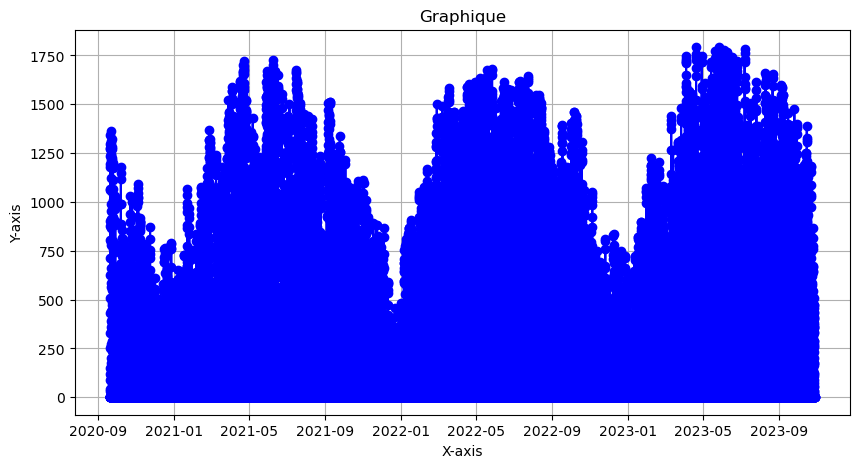

In [16]:
dataImputed2 = pd.concat([dataImputed,dataRaw['dtm']],axis=1)
plot_data2D(dataImputed2,'dtm','Solar_MW')


In [17]:
"""
Part : NC files
"""

'\nPart : NC files\n'

In [21]:
import netCDF4 as nc
import xarray as xr
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [22]:
dwd_solar = xr.open_dataset("dwd_icon_eu_pes10_20200920_20231027.nc")
dwd_solar_features = dwd_solar["SolarDownwardRadiation"].mean(dim="point").to_dataframe().reset_index()
dwd_solar_features["ref_datetime"] = dwd_solar_features["ref_datetime"].dt.tz_localize("UTC")
dwd_solar_features["valid_datetime"] = dwd_solar_features["ref_datetime"] + pd.TimedeltaIndex(dwd_solar_features["valid_datetime"],unit="hours")

In [23]:
dwd_solar_features

,ref_datetime,valid_datetime,SolarDownwardRadiation
0,2020-09-20 00:00:00+00:00,2020-09-20 00:00:00+00:00,0.000000
1,2020-09-20 00:00:00+00:00,2020-09-20 01:00:00+00:00,0.000000
2,2020-09-20 00:00:00+00:00,2020-09-20 02:00:00+00:00,0.000000
3,2020-09-20 00:00:00+00:00,2020-09-20 03:00:00+00:00,0.000000
4,2020-09-20 00:00:00+00:00,2020-09-20 04:00:00+00:00,0.000000
...,...,...,...
415426,2023-10-27 00:00:00+00:00,2023-10-31 12:00:00+00:00,180.746119
415427,2023-10-27 00:00:00+00:00,2023-10-31 15:00:00+00:00,23.697193
415428,2023-10-27 00:00:00+00:00,2023-10-31 18:00:00+00:00,0.976647
415429,2023-10-27 00:00:00+00:00,2023-10-31 21:00:00+00:00,0.932845


In [24]:
dwd_Hornsea1 = xr.open_dataset("dwd_icon_eu_hornsea_1_20200920_20231027.nc")
dwd_Hornsea1_features = dwd_Hornsea1["WindSpeed:100"].mean(dim=["latitude","longitude"]).to_dataframe().reset_index()
dwd_Hornsea1_features["ref_datetime"] = dwd_Hornsea1_features["ref_datetime"].dt.tz_localize("UTC")
dwd_Hornsea1_features["valid_datetime"] = dwd_Hornsea1_features["ref_datetime"] + pd.TimedeltaIndex(dwd_Hornsea1_features["valid_datetime"],unit="hours")

In [25]:
energy_df = pd.read_csv('Energy_Data_20200920_20231027.csv')
energy_df = energy_df.drop(['SS_Price', 'Wind_MW', 'MIP', 'DA_Price','boa_MWh'], axis=1)
energy_df["Solar_MWh_credit"] = 0.5*energy_df["Solar_MW"]
energy_df['dtm'] = pd.to_datetime(energy_df['dtm'], utc=True)


modelling_table = dwd_Hornsea1_features.merge(dwd_solar_features,how="outer",on=["ref_datetime","valid_datetime"])
modelling_table = modelling_table.set_index("valid_datetime").groupby("ref_datetime").resample("30min").ffill()
modelling_table = modelling_table.drop(columns="ref_datetime",axis=1).reset_index()
modelling_table = dwd_solar_features.merge(energy_df,how="inner",left_on="valid_datetime",right_on="dtm")
modelling_table = modelling_table[modelling_table["valid_datetime"] - modelling_table["ref_datetime"] < np.timedelta64(50,"h")]

Text(0, 0.5, 'Generation [MWh]')

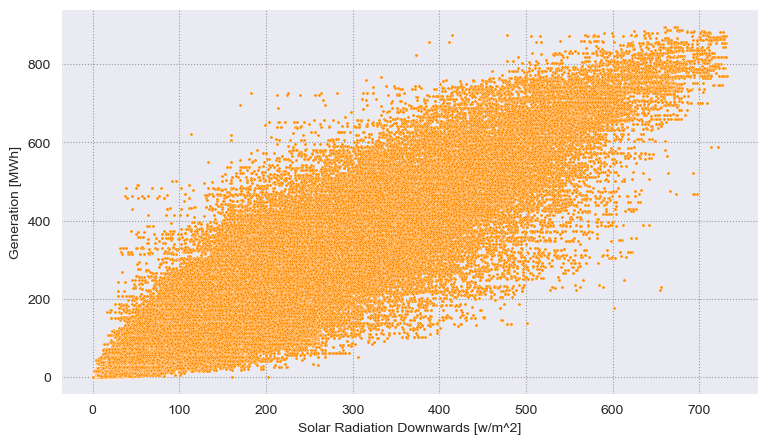

In [26]:
plt.figure(figsize=(9,5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=modelling_table, x="SolarDownwardRadiation", 
                y="Solar_MWh_credit", color='darkorange',s=5)
plt.xlabel('Solar Radiation Downwards [w/m^2]')
plt.ylabel('Generation [MWh]')

In [27]:
modelling_table

,ref_datetime,valid_datetime,SolarDownwardRadiation,dtm,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Solar_MWh_credit
0,2020-09-20 00:00:00+00:00,2020-09-20 00:00:00+00:00,0.000000,2020-09-20 00:00:00+00:00,0.0,2108.489754,2206.064655,0.0
1,2020-09-20 00:00:00+00:00,2020-09-20 01:00:00+00:00,0.000000,2020-09-20 01:00:00+00:00,0.0,2108.489754,2206.064655,0.0
2,2020-09-20 00:00:00+00:00,2020-09-20 02:00:00+00:00,0.000000,2020-09-20 02:00:00+00:00,0.0,2108.489754,2206.064655,0.0
3,2020-09-20 00:00:00+00:00,2020-09-20 03:00:00+00:00,0.000000,2020-09-20 03:00:00+00:00,0.0,2108.489754,2206.064655,0.0
4,2020-09-20 00:00:00+00:00,2020-09-20 04:00:00+00:00,0.000000,2020-09-20 04:00:00+00:00,0.0,2108.489754,2206.064655,0.0
...,...,...,...,...,...,...,...,...
414957,2023-10-26 00:00:00+00:00,2023-10-27 23:00:00+00:00,-0.003485,2023-10-27 23:00:00+00:00,0.0,2331.383994,2487.180474,0.0
414958,2023-10-26 06:00:00+00:00,2023-10-27 23:00:00+00:00,0.011918,2023-10-27 23:00:00+00:00,0.0,2331.383994,2487.180474,0.0
414959,2023-10-26 12:00:00+00:00,2023-10-27 23:00:00+00:00,0.013232,2023-10-27 23:00:00+00:00,0.0,2331.383994,2487.180474,0.0
414960,2023-10-26 18:00:00+00:00,2023-10-27 23:00:00+00:00,-0.000485,2023-10-27 23:00:00+00:00,0.0,2331.383994,2487.180474,0.0


In [28]:
"""
Part : Preprocessing 2 (Selection, creation of interesting features)
"""

'\nPart : Preprocessing 2 (Selection, creation of interesting features)\n'

In [29]:
correlationMatrix = modelling_table.corr()
correlationMatrix

,ref_datetime,valid_datetime,SolarDownwardRadiation,dtm,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Solar_MWh_credit
ref_datetime,1.000000,0.999998,0.103606,0.999998,0.107150,0.888976,0.920172,0.107150
valid_datetime,0.999998,1.000000,0.103608,1.000000,0.107148,0.888977,0.920173,0.107148
SolarDownwardRadiation,0.103606,0.103608,1.000000,0.103608,0.947368,0.087988,0.091773,0.947368
dtm,0.999998,1.000000,0.103608,1.000000,0.107148,0.888977,0.920173,0.107148
Solar_MW,0.107150,0.107148,0.947368,0.107148,1.000000,0.091692,0.095530,1.000000
Solar_capacity_mwp,0.888976,0.888977,0.087988,0.888977,0.091692,1.000000,0.997305,0.091692
Solar_installedcapacity_mwp,0.920172,0.920173,0.091773,0.920173,0.095530,0.997305,1.000000,0.095530
Solar_MWh_credit,0.107150,0.107148,0.947368,0.107148,1.000000,0.091692,0.095530,1.000000


In [30]:
featureSolar = correlationMatrix['Solar_MW']
threshold = 0.7
high_correlation_features = featureSolar[abs(featureSolar) >= threshold]
high_correlation_features



SolarDownwardRadiation    0.947368
Solar_MW                  1.000000
Solar_MWh_credit          1.000000
Name: Solar_MW, dtype: float64

In [31]:
filtered_df = modelling_table[high_correlation_features.index.tolist()]
filtered_df.drop('Solar_MWh_credit',axis=1)

,SolarDownwardRadiation,Solar_MW
0,0.000000,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0
...,...,...
414957,-0.003485,0.0
414958,0.011918,0.0
414959,0.013232,0.0
414960,-0.000485,0.0


In [32]:
filtered_df2 = KNNImputer(missing_values=np.nan,n_neighbors=3).fit_transform(filtered_df)
filtered_df2 = pd.DataFrame(filtered_df2, columns=filtered_df.columns)
filtered_df2

,SolarDownwardRadiation,Solar_MW,Solar_MWh_credit
0,0.000000,0.0,0.0
1,0.000000,0.0,0.0
2,0.000000,0.0,0.0
3,0.000000,0.0,0.0
4,0.000000,0.0,0.0
...,...,...,...
223275,-0.003485,0.0,0.0
223276,0.011918,0.0,0.0
223277,0.013232,0.0,0.0
223278,-0.000485,0.0,0.0


In [33]:
"""
Part : Prediction with Linear Regression
"""

'\nPart : Prediction with Linear Regression\n'

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
Accuracies = []
model = LinearRegression()
X,y = filtered_df2.drop('Solar_MW',axis=1),round(filtered_df2['Solar_MW'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred=np.round(y_pred)
accuracy = (y_test==y_pred).mean()
Accuracies.append(accuracy)
pd.Series(Accuracies).describe()

count    1.00000
mean     0.99832
std          NaN
min      0.99832
25%      0.99832
50%      0.99832
75%      0.99832
max      0.99832
dtype: float64

In [35]:
"""
Part : Prediction with Random Forest
"""

'\nPart : Prediction with Random Forest\n'

In [82]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
Accuracies = []
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
X,y = filtered_df2.drop('Solar_MW',axis=1),round(filtered_df2['Solar_MW'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train)
y_pred = np.round(model.predict(X_test))
accuracy = (y_test==y_pred).mean()
Accuracies.append(accuracy)
pd.Series(Accuracies).describe()

count    1.00000
mean     0.67431
std          NaN
min      0.67431
25%      0.67431
50%      0.67431
75%      0.67431
max      0.67431
dtype: float64

In [ ]:
"""
Part : Prediction with Neural Networks
"""

In [89]:
#Prend beaucoup de temps

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,5), random_state=0)
Accuracies = []
X,y = filtered_df2.drop('Solar_MW',axis=1),round(filtered_df2['Solar_MW'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train)
y_pred = np.round(model.predict(X_test))
accuracy = (y_test==y_pred).mean()
Accuracies.append(accuracy)
pd.Series(Accuracies).describe()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning:

Training interrupted by user.



count    1.000000
mean     0.565546
std           NaN
min      0.565546
25%      0.565546
50%      0.565546
75%      0.565546
max      0.565546
dtype: float64

In [ ]:
"""
Part : Prediction with ...
"""

In [ ]:
"""
Part : Best Model 
"""

In [41]:
"""
Part : DashBoard
"""

'\nPart : DashBoard\n'

In [88]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialisation de l'application Dash
app = Dash(__name__)

# Layout de l'application
app.layout = html.Div([
    html.Div(children='Régression Linéaire avec Dash'),
    html.Button('Lancer la prédiction', id='predict-button'),
    dcc.Graph(id='prediction-graph'),
])

# Assumons que data_final et data_final2 sont vos DataFrames prédéfinis

dataImputed2 = pd.DataFrame({
    'dtm': pd.date_range(start='2021-05-01', periods=50, freq='D'),
    'Solar_MW': np.random.rand(50) * 100
})

# Callback pour mettre à jour le graphique avec les prédictions
@app.callback(
    Output('prediction-graph', 'figure'),
    Input('predict-button', 'n_clicks')
)
def update_graph(n_clicks):
    if n_clicks is None:
        # Ne rien afficher avant que le bouton soit cliqué
        return go.Figure()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Création du graphique de prédiction
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataImputed2['dtm'], y=y_pred, mode='markers', name='Données réelles'))
    fig.add_trace(go.Scatter(x=dataImputed2['dtm'], y=y_test, mode='markers', name='Données réelles'))
    fig.update_layout(title='Comparaison des Prédictions et des Données Réelles', xaxis_title='Date', yaxis_title='Solar MW')

    return fig

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)  # Utilisez un numéro de port différent si nécessaire


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

